In [133]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [134]:
%run ../coronavirus.py

In [168]:
def label_from_region_subregion(region_subregion):
    region, subregion = unpack_region_subregion(region_subregion)
    if subregion:
        label = f"{region}-{subregion}"
    else:
        label = f"{region}"
    return label


def test_label_from_region_subregion():
    assert label_from_region_subregion(("Hamburg", None)) == "Hamburg"
    assert label_from_region_subregion("Hamburg") == "Hamburg"
    assert label_from_region_subregion(("Schleswig Holstein", "Pinneberg")) == "Schleswig Holstein-Pinneberg"

test_label_from_region_subregion()


def unpack_region_subregion(region_subregion):
    """Convention for regions in Germany (could also be useful for other countries later):
    
    - region_subregion is either 
      - a tuple of strings (region, subregion) or
      - a string "region"
      
    Return a a tuple (region, subregion), where subregion is None if not provided.
    """
    if isinstance(region_subregion, tuple):
        if len(region_subregion) == 1:
            region = region_subregion[0]
            subregion = None
        elif len(region_subregion) == 2:
            region, subregion = region_subregion
        else:
            raise ValueError("region_subregion must be single value or 2-valued tuple", region_subregion)
    else:
        # assume it is just the region
        assert isinstance(region_subregion, str)
        region, subregion = region_subregion, None
    return region, subregion


def get_compare_data_germany(region_subregion, compare_with_local, rolling=7):
    """Given a region_subregion for Germany, and a list of region_subregion to compare with,
    return two dataframes: one with cases and one with deaths
    where
    - each column is one country
    - data in the column is the diff of accumulated numbers
    - any zero values are removed for italy (data error)
    - apply some smoothing
    
    See unpack_region_subregion for details on region_subregion.
    """
    df_c = pd.DataFrame()
    df_d = pd.DataFrame()

    for reg_subreg in [region_subregion] + compare_with_local:
        
        region, subregion = unpack_region_subregion(reg_subreg)
        c, d = germany_get_region(state=region, landkreis=subregion)

        label = label_from_region_subregion((region, subregion))
        df_c[label + ' cases'] = c.diff().rolling(rolling, center=True).mean()
        df_d[label + ' deaths'] = d.diff().rolling(rolling, center=True).mean()

    return df_c, df_d

def make_compare_plot_germany(region_subregion, 
                              compare_with=[], #"China", "Italy", "Germany"],
                              compare_with_local=['Baden-Württemberg', 'Bayern', 'Berlin',
                                                  'Brandenburg', 'Bremen', 'Hamburg',
                                                  'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
                                                  'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland',
                                                  'Sachsen', 'Sachsen-Anhalt', 'Schleswig-Holstein',  'Thüringen'],
                              v0c=10, v0d=1):
    
    region, subregion = unpack_region_subregion(region_subregion)
    df_c1, df_d1 = get_compare_data_germany((region, subregion), compare_with_local)

    df_c2, df_d2 = get_compare_data(compare_with)

    # need to get index into same timezone before merging
    df_d1.set_index(df_d1.index.tz_localize(None), inplace=True)
    df_c1.set_index(df_c1.index.tz_localize(None), inplace=True)

    df_c = pd.merge(df_c1, df_c2, how='outer', left_index=True, right_index=True)
    df_d = pd.merge(df_d1, df_d2, how='outer', left_index=True, right_index=True)
    
    res_c = align_sets_at(v0c, df_c)
    res_d = align_sets_at(v0d, df_d)
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    ax=axes[0]
    plot_logdiff_time(ax, res_c, f"days since {v0c} cases", "daily new cases", 
                      v0=v0c, highlight={res_c.columns[0]:"C1"}, labeloffset=0.5)
    ax = axes[1]
    plot_logdiff_time(ax, res_d, f"days since {v0d} deaths", "daily new deaths", 
                      v0=v0d, highlight={res_d.columns[0]:"C0"},
                      labeloffset=0.5)

    fig.tight_layout(pad=1)
    
    title = f"Daily cases (top) and deaths (below) for Germany: {region} {subregion}"
    axes[0].set_title(title)
    
    return axes, res_c, res_d
    

Haven't found value > 1 is Series Bremen deaths
Haven't found value > 1 is Series Mecklenburg-Vorpommern deaths
Haven't found value > 1 is Series Saarland deaths


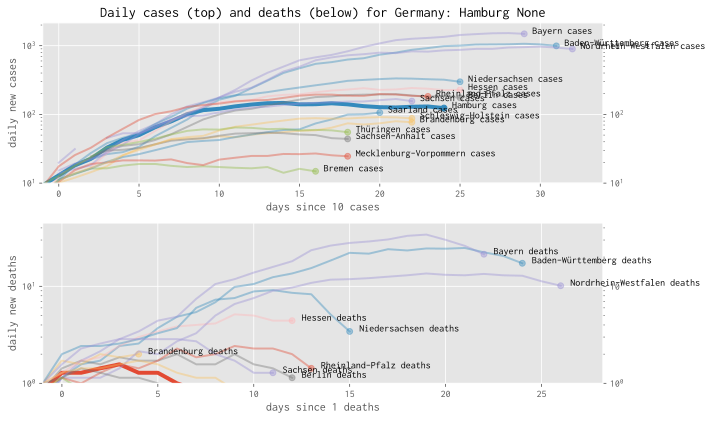

In [169]:
axes, res_c, res_d = make_compare_plot_germany("Hamburg");

Haven't found value > 1 is Series None-LK Pinneberg deaths
Haven't found value > 1 is Series Bremen deaths
Haven't found value > 1 is Series Mecklenburg-Vorpommern deaths
Haven't found value > 1 is Series Saarland deaths


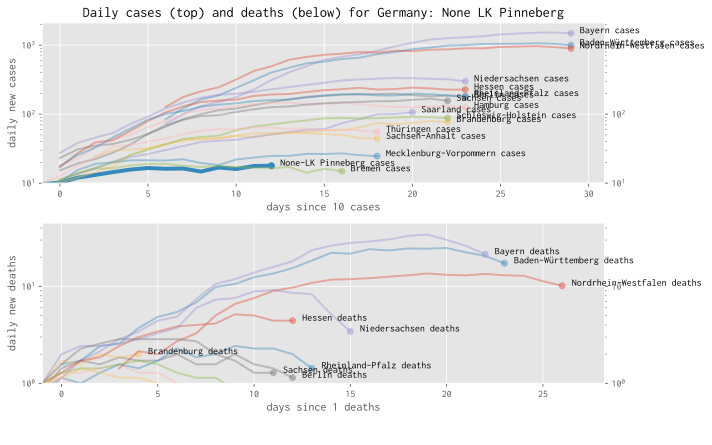

In [173]:
axes, res_c, res_d = make_compare_plot_germany((None, "LK Pinneberg"));

In [170]:
res_c

,Hamburg cases,Baden-Württemberg cases,Bayern cases,Berlin cases,Brandenburg cases,Bremen cases,Hessen cases,Mecklenburg-Vorpommern cases,Niedersachsen cases,Nordrhein-Westfalen cases,Rheinland-Pfalz cases,Saarland cases,Sachsen cases,Sachsen-Anhalt cases,Schleswig-Holstein cases,Thüringen cases
date,,,,,,,,,,,,,,,,
-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
res

,Hamburg cases,Baden-Württemberg cases,Bayern cases,Berlin cases,Brandenburg cases,Bremen cases,Hessen cases,Mecklenburg-Vorpommern cases,Niedersachsen cases,Nordrhein-Westfalen cases,Rheinland-Pfalz cases,Saarland cases
date,,,,,,,,,,,,
2020-02-29,NaN,6.571429,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.857143,NaN,NaN
2020-03-01,NaN,11.000000,4.285714,NaN,NaN,NaN,NaN,NaN,NaN,31.285714,NaN,NaN
2020-03-03,NaN,22.142857,13.857143,NaN,NaN,NaN,NaN,NaN,NaN,45.428571,NaN,NaN
2020-03-04,NaN,26.428571,16.142857,NaN,NaN,NaN,3.142857,NaN,4.571429,53.142857,NaN,NaN
2020-03-05,3.000000,28.285714,18.142857,NaN,NaN,NaN,5.571429,NaN,4.857143,53.285714,2.000000,NaN
2020-03-06,5.714286,33.857143,29.142857,NaN,NaN,NaN,7.142857,NaN,6.857143,64.571429,2.857143,NaN
2020-03-07,9.285714,48.142857,42.714286,12.285714,NaN,NaN,12.000000,NaN,11.000000,84.142857,5.142857,NaN
2020-03-08,13.000000,63.714286,57.285714,18.000000,NaN,NaN,NaN,NaN,18.571429,100.285714,8.857143,NaN
2020-03-09,18.142857,84.285714,72.285714,23.142857,NaN,NaN,17.000000,4.000000,27.428571,127.285714,17.571429,NaN


In [95]:
s

China cases             2405.571429
Italy cases                0.285714
US cases                   0.857143
Korea, South cases         1.571429
Spain cases                0.142857
United Kingdom cases       0.285714
Iran cases                 0.000000
Name: 2020-01-31 00:00:00, dtype: float64

In [75]:
c2.set_index(c2.index.tz_localize(None), inplace=True)

In [76]:
c2

,Hamburg cases,Baden-Württemberg cases,Bayern cases,Berlin cases,Brandenburg cases,Bremen cases,Hessen cases,Mecklenburg-Vorpommern cases,Niedersachsen cases,Nordrhein-Westfalen cases,Rheinland-Pfalz cases,Saarland cases
date,,,,,,,,,,,,
2020-02-29,NaN,6.571429,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.857143,NaN,NaN
2020-03-01,NaN,11.000000,4.285714,NaN,NaN,NaN,NaN,NaN,NaN,31.285714,NaN,NaN
2020-03-03,NaN,22.142857,13.857143,NaN,NaN,NaN,NaN,NaN,NaN,45.428571,NaN,NaN
2020-03-04,NaN,26.428571,16.142857,NaN,NaN,NaN,3.142857,NaN,4.571429,53.142857,NaN,NaN
2020-03-05,3.000000,28.285714,18.142857,NaN,NaN,NaN,5.571429,NaN,4.857143,53.285714,2.000000,NaN
2020-03-06,5.714286,33.857143,29.142857,NaN,NaN,NaN,7.142857,NaN,6.857143,64.571429,2.857143,NaN
2020-03-07,9.285714,48.142857,42.714286,12.285714,NaN,NaN,12.000000,NaN,11.000000,84.142857,5.142857,NaN
2020-03-08,13.000000,63.714286,57.285714,18.000000,NaN,NaN,NaN,NaN,18.571429,100.285714,8.857143,NaN
2020-03-09,18.142857,84.285714,72.285714,23.142857,NaN,NaN,17.000000,4.000000,27.428571,127.285714,17.571429,NaN


In [4]:
x = fetch_data_germany()

Please be patient - downloading data from https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv ...
Completed downloading 37766 rows in 30.3 seconds.


In [5]:
type(x)

pandas.core.frame.DataFrame

In [11]:
sorted(x['Bundesland'].drop_duplicates().values)

['Baden-Württemberg',
 'Bayern',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hessen',
 'Mecklenburg-Vorpommern',
 'Niedersachsen',
 'Nordrhein-Westfalen',
 'Rheinland-Pfalz',
 'Saarland',
 'Sachsen',
 'Sachsen-Anhalt',
 'Schleswig-Holstein',
 'Thüringen']